In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
plt.style.use('fivethirtyeight')

In [0]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


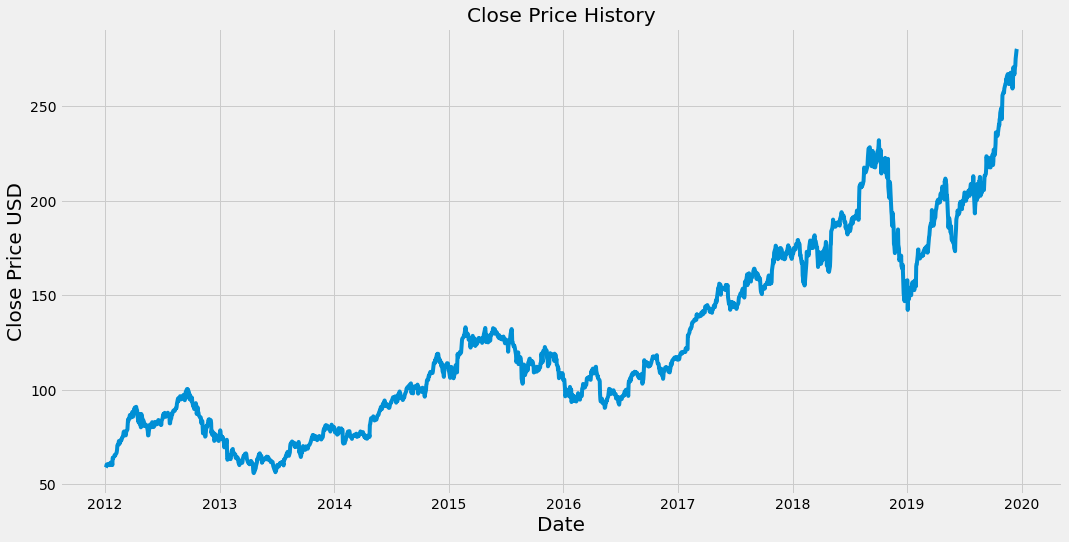

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df.Close)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize=20)
plt.show()

In [20]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1603

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [0]:
train_data = scaled_data[:training_data_len, :]

In [0]:
X_train = []
y_train = []
for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [0]:
X_train, y_train =np.array(X_train), np.array(y_train)

In [46]:
X_train.shape, y_train.shape

((1543, 60), (1543,))

In [47]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1543, 60, 1)

In [48]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1543/1543 [==============================] - 61s 40ms/step - loss: 6.9482e-04
Epoch 2/5
1543/1543 [==============================] - 67s 44ms/step - loss: 2.5137e-04
Epoch 3/5
1543/1543 [==============================] - 68s 44ms/step - loss: 2.1303e-04
Epoch 4/5
1543/1543 [==============================] - 66s 43ms/step - loss: 1.9913e-04
Epoch 5/5
1543/1543 [==============================] - 61s 39ms/step - loss: 1.5349e-04


In [0]:
test_data = scaled_data[training_data_len-60:, :]
y_test = dataset[training_data_len:, :]
X_test = []
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])
  


In [0]:
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [63]:
rmse

15.26496280670166

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


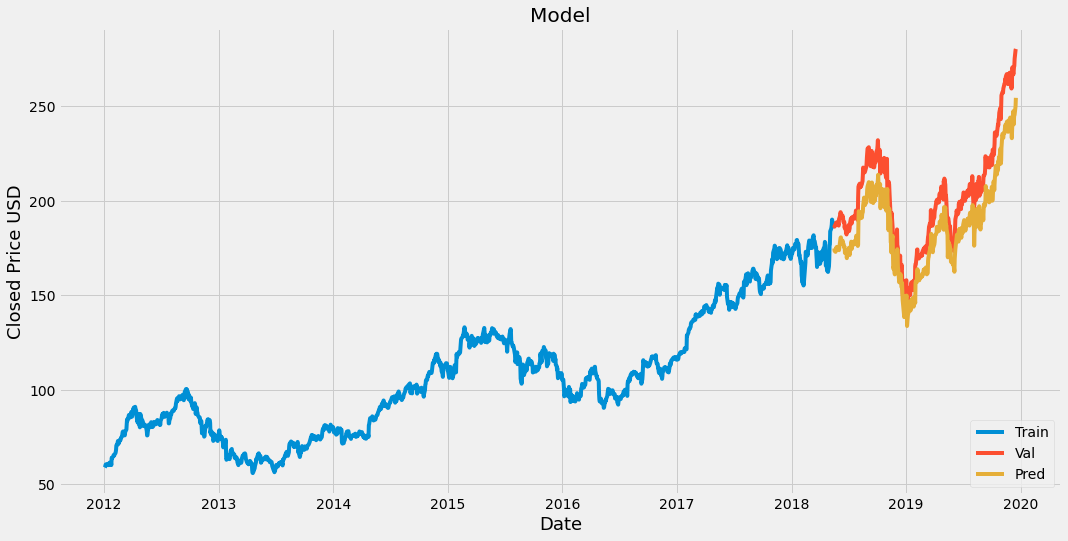

In [67]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price USD', fontsize=18)
plt.plot(train.Close)
#plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid.Close)
plt.plot(valid.Predictions)
plt.legend(['Train', 'Val', 'Pred'], loc='lower right')
plt.show()

In [0]:
valid

In [73]:
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,174.768372
2018-05-18,186.309998,173.449936
2018-05-21,187.630005,172.951111
2018-05-22,187.160004,174.570206
2018-05-23,188.360001,174.038177
...,...,...
2019-12-11,270.769989,243.787552
2019-12-12,271.459991,245.665375
2019-12-13,275.149994,245.783463
